In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split

# **data**
churn
0==> 非解約
1==> 解約者

In [ ]:
df = pd.read_csv('')
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,...,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.000000,42.333333,0.0,45.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.000000,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,132.600000,0.000000,24.000000,...,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.000000,69.000000,0.0,193.333333,0.000000,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.000000,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.000000,75.333333,0.000000,157.000000,...,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.000000,0.333333,0.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,5.193333,0.000000,1.000000,...,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.000000,1.333333,0.0,3.666667,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.000000,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.000000,3.380000,0.000000,3.666667,...,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.000000,94.666667,0.0,137.000000,0.000000,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.000000,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.000000,173.476667,0.000000,90.333333,...,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.0,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000000,0.0,45.333333,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,94.866667,0.000000,2.016667,2.666667,1.680000,0.000000,0.000000,20.666667,0.000000,23.566667,0.000000,26.666667,...,3751,74.34,452.10,178.62,410,121,73,603.0,159.0,100.0,U,LOS ANGELES AREA,N,N,29.98999,1.0,1.0

In [ ]:
df.groupby("churn")['months'].median()

churn
0    16
1    17
Name: months, dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(10)

numbcars      49366
dwllsize      38308
HHstatin      37923
ownrent       33706
dwlltype      31909
lor           30190
income        25436
adults        23019
infobase      22079
hnd_webcap    10189
dtype: int64

In [ ]:
Nan_sum = df.isnull().sum()
rate_Nan = Nan_sum / df.shape[0]
for i in range(rate_Nan.shape[0] - 1):
    print(i)

# **特徴量生成**

In [ ]:
df['mou_rev'] = df.mou_Mean/df.rev_Mean

In [ ]:
df['mou_rev'] = df.fillna(df['mou_rev'].median())
df

NameError: ignored

In [ ]:
df.isnull().sum()

rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
mou_rev           0
Length: 101, dtype: int64

# **欠損値**

In [ ]:
"""
threshのほうが便利だ
"""
def Nan_drop(df, rate):
    Nan_sum = df.isnull().sum()
    rate_Nan = Nan_sum / df.shape[0]#[0]も[1]もshapeの結果変わらん。Nan_sumの行数に依存する。計算内容は変わるよ
    drop_list = list()
    for i in range(rate_Nan.shape[0]):
        if rate_Nan[i] > rate:#[i]番目の値 > rate
            drop_list.append(i)
        else:
            pass
    return df.drop(df.columns[drop_list], axis=1, inplace=True)
Nan_drop(df, 0.2)

In [ ]:
def Nan_drop_axis0(df, rate):
    Nan_sum = df.isnull().sum(axis=1)
    rate_Nan = Nan_sum / df.shape[1]
    drop_list = list()
    for i in range(rate_Nan.shape[0]):
        if rate_Nan[i] > rate:
            drop_list.append(i)
        else:
            pass
    return df.drop(drop_list, inplace=True)
Nan_drop_axis0(df, 0.2)

In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
df

# 新しいセクション

In [ ]:
NUY = pd.get_dummies(df.new_cell)

In [ ]:
df.totrev.describe()

count    99991.000000
mean      1031.905404
std        852.891054
min          3.650000
25%        518.995000
50%        804.520000
75%       1263.725000
max      27321.500000
Name: totrev, dtype: float64

# **損失額を求める**

In [ ]:
Mean_rev = df.rev_Mean.mean()

In [ ]:
#chun0のひとの平均利用額
churn0 = np.count_nonzero(df['churn'] == 0)
churn0 * Mean_rev

2961601.155688427

In [ ]:
churn1 = np.count_nonzero(df['churn'] == 1)
churn1 * Mean_rev

2909868.8490391783

In [ ]:
df_churn = pd.DataFrame({
    'churn*rev_Mean':[churn0, churn1]})
df_churn

,churn*rev_Mean
0,50436
1,49555


In [ ]:
df_churn.columns = ['churn*rev_Mean']
df_churn.index = ["churn0", 'churn1']
print(df_churn)

        churn*rev_Mean
churn0           50436
churn1           49555


In [ ]:
pd.DataFrame([churn0, churn1],columns=["churn*rev_Mean"], index=['churn0', 'churn1'])

,churn*rev_Mean
churn0,50436
churn1,49555


# **グラフ**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


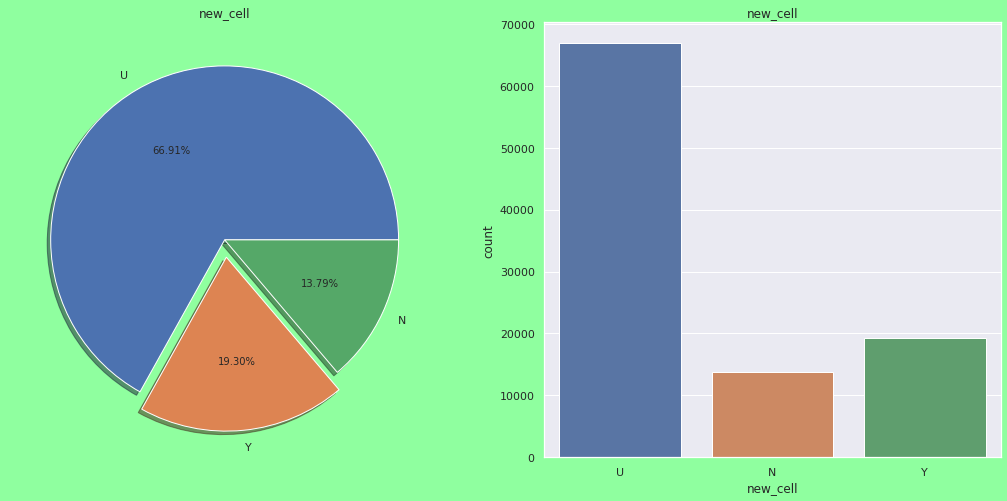

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8), facecolor='xkcd:mint green')#Figureオブジェクトとそれに属する一つのAxesオブジェクトを同時に作成
df['new_cell'].value_counts().plot.pie(explode=[0, 0.1, 0], autopct='%1.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('new_cell')
ax[0].set_ylabel('')
sns.countplot('new_cell', data=df, ax=ax[1])
ax[1].set_title('new_cell')
plt.show()

# **df_origin**

In [ ]:
df_origin = pd.read_csv('/content/drive/MyDrive/Telecom_customer churn.csv')

Text(0, 0.5, 'change_mou')

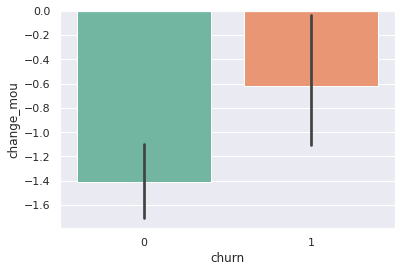

In [ ]:
change_mou_churn = sns.barplot(x='churn', y='change_rev', data=df_origin, palette='Set2')
change_mou_churn.set_ylabel('change_mou')

In [ ]:
a = df_origin[['churn', 'change_rev', 'change_mou']].groupby('churn').median()
b = df_origin[['churn', 'change_rev', 'change_mou']].groupby('churn').mean()
pd.merge(a, b, on='churn')
#一行で書ける気がする

,change_rev_x,change_mou_x,change_rev_y,change_mou_y
churn,,,,
0,-0.2925,-3.0,-1.410195,-5.344265
1,-0.3150,-10.0,-0.621263,-22.759003


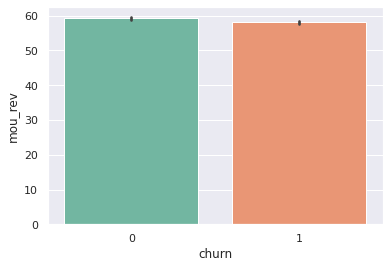

In [ ]:
new = sns.barplot(x='churn', y=df.mou_rev, data=df, palette='Set2')

In [ ]:
df[['churn', 'mou_rev']].groupby('churn').mean()

DataError: ignored

In [ ]:
X = df.drop('churn', axis=1).values
y = df.churn.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
n_target0, n_target1 = len(df[df['churn'] == 0]), len(df[df['churn'] == 1])
n_all = n_target0 + n_target1
print('target0 の割合：', n_target0/n_all)
print('target1の割合：', n_target1/n_all)

target0 の割合： 0.50438
target1の割合： 0.49562


In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="bwr", linewidths=0.1)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


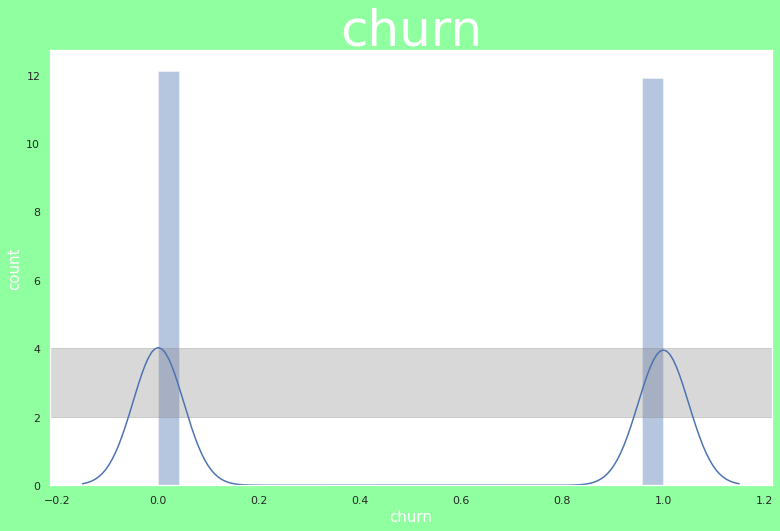

In [ ]:
fig = plt.figure(figsize=(12.944, 8))
plt.title('churn', fontsize=50, color='white')
plt.xlabel('churn', color='white', fontsize=15)
plt.ylabel('count', color='white', fontsize=15)
ax = sns.distplot(df['churn'])
ax.axhspan(2, 4, color='gray', alpha=0.3)#お試し
# ax -> グラフの枠内
ax.patch.set_facecolor('white')

# fig -> グラフの枠外
fig.patch.set_facecolor("xkcd:mint green")

<Figure size 1440x720 with 0 Axes>

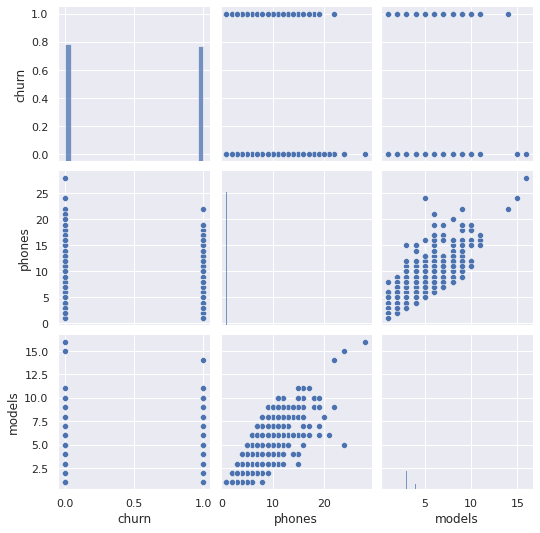

In [ ]:
fig = plt.figure(figsize=(20, 10))
fig.patch.set_facecolor("xkcd:mint green")
sns.pairplot(df[['churn', 'phones', 'models']])
plt.grid(True)

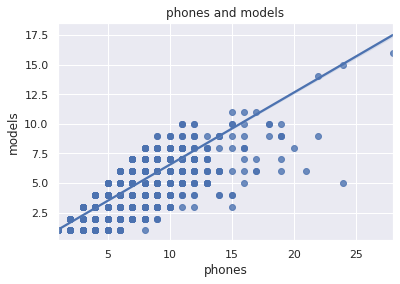

In [ ]:
scatter, ax = plt.subplots()
ax = sns.regplot(x='phones', y='models', data=df)
ax.set_title('phones and models')
ax.set_xlabel('phones')
ax.set_ylabel('models')
plt.show()

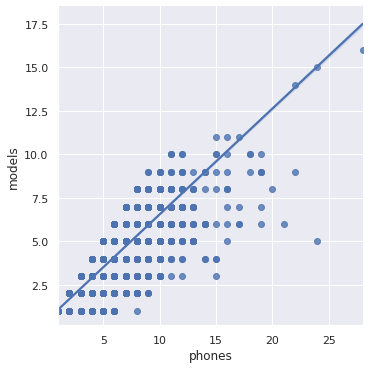

In [ ]:
#lmplotは図を作成するだけだよ
fig = sns.lmplot(x='phones', y='models', data=df)
plt.show()

Text(0.5, 1.03, '')

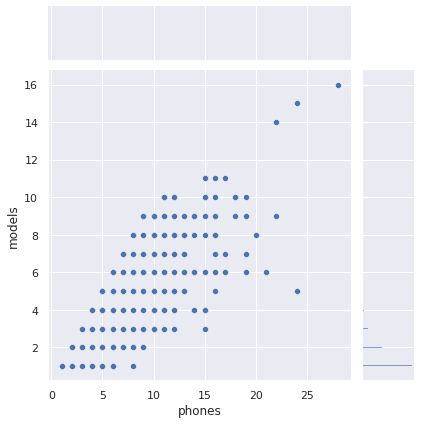

In [ ]:
joint = sns.jointplot(x='phones', y='models', data=df)
joint.set_axis_labels(xlabel='phones', ylabel='models')
joint.fig.suptitle('', fontsize=10, y=1.03)

# **相関**

In [ ]:
df_origin_corr = df_origin.corr()
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

#print(corr.sort_values(by='churn', ascending=False))
df_origin_corr.eqpdays.sort_values(ascending=False).head(20)


eqpdays          1.000000
months           0.483320
churn            0.112691
income           0.105680
adjrev           0.064601
totrev           0.056171
forgntvl         0.046153
truck            0.043237
lor              0.041334
rv               0.030765
adults           0.011267
change_rev       0.001580
actvsubs        -0.003537
change_mou      -0.007486
recv_sms_Mean   -0.009658
callfwdv_Mean   -0.010307
blck_dat_Mean   -0.014944
numbcars        -0.019281
roam_Mean       -0.022265
uniqsubs        -0.025934
Name: eqpdays, dtype: float64

In [ ]:
df

In [ ]:
    ぁｓぁｓa = df['months']
print(a.median())
print(a.mean())
print(a.max())

16.0
18.833144983048474
61


# **LightGBM可視化したい**

In [ ]:
import warnings # 実行に関係ない警告を無視
warnings.filterwarnings('ignore')
import lightgbm as lgb #LightGBM
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
def plot_feature_importance(df):
    n_features = len(df)
    df_plot = df.sort_values('churn')
    f_importance_plot = df_plot['churn'].values
    plt.barh(range(n_features), f_importance_plot, align='center')
    cols_plot = df_plot['feature'].values
    plt.yticks(np.arange(n_features), cols_plot)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importance(df)

In [ ]:
1support_df = pd.read_csv('/content/drive/MyDrive/support_df.csv', header=None)
#support_df.loc[:, 1]
support_df

,0,1
0,rev_Mean,Mean monthly revenue (charge amount)
1,mou_Mean,Mean number of monthly minutes of use
2,totmrc_Mean,Mean total monthly recurring charge
3,da_Mean,Mean number of directory assisted calls
4,ovrmou_Mean,Mean overage minutes of use
...,...,...
95,kid11_15,Child 11 - 15 years of age in household
96,kid16_17,Child 16 - 17 years of age in household
97,creditcd,Credit card indicator
98,eqpdays,Number of days (age) of current equipment


In [ ]:
df.loc[:5, 'ethnic':]

,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,N,U,U,U,U,U,Y,361.0,1000001
1,Z,U,U,U,U,U,Y,240.0,1000002
2,N,U,Y,U,U,U,Y,1504.0,1000003
3,U,Y,U,U,U,U,Y,1812.0,1000004
4,I,U,U,U,U,U,Y,434.0,1000005
5,U,U,U,U,U,U,Y,458.0,1000006


# **関係ないやつ**

In [ ]:
import folium

In [ ]:
covid = pd.read_csv('/content/drive/MyDrive/nhk_news_covid19_prefectures_daily_data.csv')
covid.head()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
0,2020/1/16,1,北海道,0,0,0,0
1,2020/1/17,1,北海道,0,0,0,0
2,2020/1/18,1,北海道,0,0,0,0
3,2020/1/19,1,北海道,0,0,0,0
4,2020/1/20,1,北海道,0,0,0,0


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17014 entries, 0 to 17013
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   日付                17014 non-null  object
 1   都道府県コード           17014 non-null  int64 
 2   都道府県名             17014 non-null  object
 3   各地の感染者数_1日ごとの発表数  17014 non-null  int64 
 4   各地の感染者数_累計        17014 non-null  int64 
 5   各地の死者数_1日ごとの発表数   17014 non-null  int64 
 6   各地の死者数_累計         17014 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 930.6+ KB


In [ ]:
map = folium.Map(location=[35, 140])
map

In [ ]:
tokyo = [35.380868766737905, 139.4721489670032]
map = folium.Map(location=tokyo, tiles='cartodbpositron',zoom_start=1000)
map

In [ ]:
geojson = 'tokyo23.json'

In [ ]:
map.choropleth(
    geo_data=geojson,
    name='chorapleth',
    data=tokyo,
    columns=['都道府県コード', '各地の感染者数_1日ごとの発表数'],
    key_on='feature.id',
    fill_color='YlGn',
    threshold_scale=[0, 40, 80, 120, 160, 200], # 境界値を指定
    fill_opacity=0.7,# 透明度（色塗り）
    line_opacity=0.2,# 透明度（境界)
    nan_fill_color="white", 
    legend_name='各地の感染者数_1日ごとの発表数'
).add_to(map)

In [ ]:
from folium.plugins import HeatMap
map = folium.Map(location=[35.710402, 139.810668], zoom_start=5)

HeatMap(covid[['都道府県コード','各地の感染者数_1日ごとの発表数']], radius=5, blur=5).add_to(map)
map

In [ ]:
a = [10, 1]
b = [7, 8]
if a[1] > b[1]:
    print(a[1])
else :
    print(b[1])

8


# **importML**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from inspect import signature
from sklearn.metrics import *
from sklearn.utils.multiclass import unique_labels
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras import optimizers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Telecom_customer churn.csv')

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def plot_roc(y_true, y_pred, title):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    #print(fpr, tpr, prec, rec)
    plt.plot(fpr, tpr)
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_true,y_pred),3)))
    plt.legend(loc='best')
    plt.plot([0,1], [0,1])
    plt.xticks(np.arange(0,1.1,0.1))
    plt.yticks(np.arange(0,1.1,0.1))
    plt.grid(b=True, which='both')
    plt.title(title)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.show()

In [ ]:
df.columns[df.dtypes.values == "object"]

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

In [ ]:
categ_nominal = ['new_cell', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap',
                 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic',
                 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']

categ_ordinal_ordered = ['crclscod']

In [ ]:
pd.get_dummies(df['new_cell'], prefix='new_cell', dummy_na=True)
df_p = df.copy()
for i in categ_nominal:
    df = pd.concat([df, pd.get_dummies(df[i], prefix=i, dummy_na=True)], sort=False, axis=1)

In [ ]:
df = df.drop(categ_nominal, axis=1)

In [ ]:
for i in categ_ordinal_ordered:
    s_a = sorted(df[i].unique())
    s_a_dict = {i:x for x,i in enumerate(s_a)}
    df[i] = df[i].map(s_a_dict)

In [ ]:
df.columns[df.dtypes.values == "object"] 

Index([], dtype='object')

# df_discount整形

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def plot_roc(y_true, y_pred, title):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    #print(fpr, tpr, prec, rec)
    plt.plot(fpr, tpr)
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_true,y_pred),3)))
    plt.legend(loc='best')
    plt.plot([0,1], [0,1])
    plt.xticks(np.arange(0,1.1,0.1))
    plt.yticks(np.arange(0,1.1,0.1))
    plt.grid(b=True, which='both')
    plt.title(title)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.show()

In [ ]:
df_discount.columns[df_discount.dtypes.values == "object"]

In [ ]:
categ_nominal = ['new_cell', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap',
                 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic',
                 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']

categ_ordinal_ordered = ['crclscod']

pd.get_dummies(df['new_cell'], prefix='new_cell', dummy_na=True)
df_discount_p = df_discount.copy()
for i in categ_nominal:
    df = pd.concat([df, pd.get_dummies(df[i], prefix=i, dummy_na=True)], sort=False, axis=1)

In [ ]:
df_discount['vce_blk_rate'] = 0
df_discount.loc[ df_discount['plcd_vce_Mean'] > 0, 'vce_blk_rate'] = df_discount['blck_vce_Mean'] / df_discount['plcd_vce_Mean']

df_discount['vce_drp_rate'] = 0
df_discount.loc[ df_discount['plcd_vce_Mean'] > 0, 'vce_drp_rate'] = df_discount['drop_vce_Mean'] / df_discount['plcd_vce_Mean']

df_discount['dat_blk_rate'] = 0
df_discount.loc[ df_discount['plcd_dat_Mean'] > 0, 'dat_blk_rate'] = df_discount['blck_dat_Mean'] / df_discount['plcd_dat_Mean']

df_discount['dat_drp_rate'] = 0
df_discount.loc[ df_discount['plcd_dat_Mean'] > 0, 'dat_drp_rate'] = df_discount['drop_dat_Mean'] / df_discount['plcd_dat_Mean']

df_discount['vce_cmpt_rate'] = 0
df_discount.loc[ df_discount['plcd_vce_Mean'] > 0, 'vce_cmpt_rate'] = df_discount['comp_vce_Mean'] / df_discount['plcd_vce_Mean']

df_discount['dat_cmpt_rate'] = 0
df_discount.loc[ df_discount['plcd_dat_Mean'] > 0, 'dat_cmpt_rate'] = df_discount['comp_dat_Mean'] / df_discount['plcd_dat_Mean']

df_discount['tot_cmpt_rate'] = 0
df_discount.loc[ df_discount['attempt_Mean'] > 0, 'tot_cmpt_rate'] = df_discount['complete_Mean'] / df_discount['attempt_Mean']

df_discount['tot_drp_blk_rate'] = 0
df_discount.loc[ df_discount['attempt_Mean'] > 0, 'tot_drp_blk_rate'] = df_discount['drop_blk_Mean'] / df_discount['attempt_Mean']

df_discount['vce_dat_ratio'] = 0
df_discount.loc[ (df_discount['plcd_vce_Mean'] + df_discount['plcd_dat_Mean']) > 0, 'tot_drp_blk_rate'] = df_discount['plcd_vce_Mean'] /  (df_discount['plcd_vce_Mean'] + df_discount['plcd_dat_Mean'])

df_discount['diff_3mon_overall_mou'] = 0
df_discount.loc[ (df_discount['avgmou'] == df_discount['avgmou']) & (df_discount['avg3mou'] == df_discount['avg3mou']), 'diff_3mon_overall_mou'] = (df_discount['avg3mou'] - df_discount['avgmou']) / df_discount['avgmou']

df_discount['diff_3mon_overall_qty'] = 0
df_discount.loc[ (df_discount['avgqty'] == df_discount['avgqty']) & (df_discount['avg3qty'] == df_discount['avg3qty']), 'diff_3mon_overall_qty'] = (df_discount['avg3qty'] - df_discount['avgqty']) / df_discount['avgqty']

df_discount['diff_3mon_overall_rev'] = 0
df_discount.loc[ (df_discount['avgrev'] == df_discount['avgrev']) & (df_discount['avg3rev'] == df_discount['avg3rev']), 'diff_3mon_overall_rev'] = (df_discount['avg3rev'] - df_discount['avgrev']) / df_discount['avgrev']

df_discount['diff_6mon_overall_mou'] = 0
df_discount.loc[ (df_discount['avgmou'] == df_discount['avgmou']) & (df_discount['avg6mou'] == df_discount['avg6mou']), 'diff_6mon_overall_mou'] = (df_discount['avg6mou'] - df_discount['avgmou']) / df_discount['avgmou']

df_discount['diff_6mon_overall_qty'] = 0
df_discount.loc[ (df_discount['avgqty'] == df_discount['avgqty']) & (df_discount['avg6qty'] == df_discount['avg6qty']), 'diff_6mon_overall_qty'] = (df_discount['avg6qty'] - df_discount['avgqty']) / df_discount['avgqty']

df_discount['diff_6mon_overall_rev'] = 0
df_discount.loc[ (df_discount['avgrev'] == df_discount['avgrev']) & (df_discount['avg6rev'] == df_discount['avg6rev']), 'diff_6mon_overall_rev'] = (df_discount['avg6rev'] - df_discount['avgrev']) / df_discount['avgrev']

df_discount['total_nulls'] = 0
df_discount.loc[:, 'total_nulls'] = np.sum(pd.isnull(df_discount), axis=1)

df_discount['eqpdays_digitized'] = np.digitize(df_discount['eqpdays'], bins=[-10, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 5000])

In [ ]:
df_discount

In [ ]:
corr_mat = df_discount.corr(method='spearman')#スピアマンの順位相関係数
#corr_mat.churn.sort_values(ascending=False)

In [ ]:
corr_mat.loc[ corr_mat['churn'] == 1, 'churn'] = np.nan
dev = 1
s_6 = corr_mat['churn'].mean() + corr_mat['churn'].std() * dev
s__6 = corr_mat['churn'].mean() - corr_mat['churn'].std() * dev
print(s_6, s__6)

0.020723273042360237 -0.04314139725938776


In [ ]:
reduced_features = corr_mat[(corr_mat['churn'] >= s_6) | (corr_mat['churn'] <= s__6)].index.values.tolist()
reduced_features.extend(['churn'])

In [ ]:
df_discount_o = df_discount.copy()
df_discount_o

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,...,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_nan,ethnic_B,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,ethnic_nan,kid0_2_U,kid0_2_Y,kid0_2_nan,kid3_5_U,kid3_5_Y,kid3_5_nan,kid6_10_U,kid6_10_Y,kid6_10_nan,kid11_15_U,kid11_15_Y,kid11_15_nan,kid16_17_U,kid16_17_Y,kid16_17_nan,creditcd_N,creditcd_Y,creditcd_nan
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.000000,42.333333,0.0,45.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.000000,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,132.600000,0.000000,24.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.000000,69.000000,0.0,193.333333,0.000000,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.000000,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.000000,75.333333,0.000000,157.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.000000,0.333333,0.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,5.193333,0.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.000000,1.333333,0.0,3.666667,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.000000,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.000000,3.380000,0.000000,3.666667,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.000000,94.666667,0.0,137.000000,0.000000,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.000000,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.000000,173.476667,0.000000,90.333333,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.0,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000000,0.0,45.333333,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,94.866667,0.000000,2.016667,2.666667,1.680000,0.000000,0.000000,20.666667,0.000000,23.566667,0.000000,26.666667,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.0,1.000000,0.0,12.333333,0.0,69.333333,0.000000,15.333333,0.0,53.333333,0.000000,0.000000,0.000000,0.000000,9.000000,0.333333,100.760000,0.000000,21.413333,6.666667,14.893333,0.000000,0.000000,60.333333,0.000000,121.790000,0.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0

In [ ]:
RANDOM_STATE = 91
TEST_SIZE = 0.3
models = dict() #trained models will be kept in this dict as "ModelName": Model

classifiers = {
    "Decision trees" : DecisionTreeClassifier(max_depth=5),
    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "Adaboost" : AdaBoostClassifier(n_estimators=200, learning_rate=0.01),
}

In [ ]:
df_discount = df_discount_o.copy()
df_discount

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,...,dwllsize_M,dwllsize_N,dwllsize_O,dwllsize_nan,ethnic_B,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,ethnic_nan,kid0_2_U,kid0_2_Y,kid0_2_nan,kid3_5_U,kid3_5_Y,kid3_5_nan,kid6_10_U,kid6_10_Y,kid6_10_nan,kid11_15_U,kid11_15_Y,kid11_15_nan,kid16_17_U,kid16_17_Y,kid16_17_nan,creditcd_N,creditcd_Y,creditcd_nan
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.000000,42.333333,0.0,45.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.000000,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,132.600000,0.000000,24.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.000000,69.000000,0.0,193.333333,0.000000,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.000000,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.000000,75.333333,0.000000,157.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.000000,0.333333,0.0,6.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,5.193333,0.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.000000,1.333333,0.0,3.666667,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.000000,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.000000,3.380000,0.000000,3.666667,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.000000,94.666667,0.0,137.000000,0.000000,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.000000,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.000000,173.476667,0.000000,90.333333,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.0,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000000,0.0,45.333333,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,94.866667,0.000000,2.016667,2.666667,1.680000,0.000000,0.000000,20.666667,0.000000,23.566667,0.000000,26.666667,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.0,1.000000,0.0,12.333333,0.0,69.333333,0.000000,15.333333,0.0,53.333333,0.000000,0.000000,0.000000,0.000000,9.000000,0.333333,100.760000,0.000000,21.413333,6.666667,14.893333,0.000000,0.000000,60.333333,0.000000,121.790000,0.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0

In [ ]:
from sklearn.impute import SimpleImputer
#Check different NA handling options.

OPTION = 4
TECH = 'median' #technique to apply for OPTION 2 setting

if OPTION == 1:
    #Option 1, drop na
    df_discount = df_discount.dropna(axis=1)
elif OPTION == 2:
    #Take a fill approach
    #NA handling using different techniques just to see the impact.
    if TECH == 'median':
        df_discount = df_discount.fillna(value=df_discount.median())
        print("Applying median to all nan values.")
    elif TECH == 'mean':
        df_discount = df_discount.fillna(value=df_discount.mean())
        print("Applying mean to all nan values.")
    elif TECH == 'mode':
        df_discount = df_discount.fillna(value=df_discount.mode())
        print("Applying mode to all nan values.")
    else:
        df_discount = df_discount.fillna(value=0)
        print("Applying 0 to all nan values.")
elif OPTION == 3: #impute
    my_imputer = SimpleImputer()
    df_discount_i = my_imputer.fit_transform(df_discount)
    df_discount = pd.DataFrame(df_discount_i, columns=df_discount.columns.values)
elif OPTION == 4:
    # make copy to avoid changing original data (when Imputing)
    new_data = df_discount.copy()

    # make new columns indicating what will be imputed
    cols_with_missing = (col for col in new_data.columns if new_data[col].isnull().any())
    for col in cols_with_missing:
        new_data[col + '_was_missing'] = new_data[col].isnull()
    # Imputation
    my_imputer = SimpleImputer(strategy=TECH)
    new_data = pd.DataFrame(my_imputer.fit_transform(new_data), columns=new_data.columns)
    df_discount = new_data.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

df_discount_X = sc.fit_transform(df_discount)
df_discount = pd.DataFrame(df_discount_X, columns=df_discount.columns.values)

In [ ]:
y = df_discount['churn']
df_discount = df_discount.drop([x for x in ['churn', 'Customer_ID'] if x in df_discount.columns], axis=1)

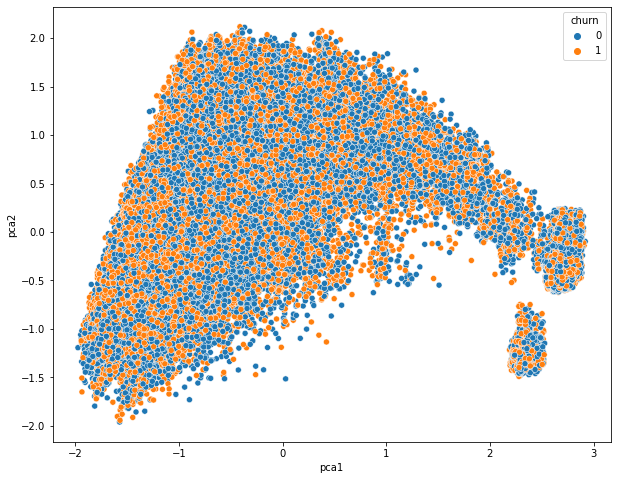

In [ ]:
pca = PCA(n_components=2, svd_solver='full')
df_discount_pca = pca.fit_transform(df)



df_o["pca1"] = df_pca[:, 0]
df_o["pca2"] = df_pca[:, 1]

plt.subplots(figsize=(10,8))
sns.scatterplot(data=df_o, x="pca1", y="pca2", hue="churn")
plt.show()

[0]	eval-error:0.398933	train-error:0.366086
[1]	eval-error:0.3923	train-error:0.3551
[2]	eval-error:0.3923	train-error:0.348414
[3]	eval-error:0.386	train-error:0.344843
[4]	eval-error:0.385967	train-error:0.343171
[5]	eval-error:0.381667	train-error:0.337
[6]	eval-error:0.381	train-error:0.336286
[7]	eval-error:0.379867	train-error:0.329729
[8]	eval-error:0.378967	train-error:0.328029
[9]	eval-error:0.375167	train-error:0.324886
[10]	eval-error:0.375	train-error:0.322229
[11]	eval-error:0.375333	train-error:0.3198
[12]	eval-error:0.3748	train-error:0.317943
[13]	eval-error:0.373467	train-error:0.315343
[14]	eval-error:0.371133	train-error:0.311843
[15]	eval-error:0.370333	train-error:0.311514
[16]	eval-error:0.372067	train-error:0.313429
[17]	eval-error:0.371833	train-error:0.308843
[18]	eval-error:0.3697	train-error:0.308014
[19]	eval-error:0.3712	train-error:0.310129
[20]	eval-error:0.3689	train-error:0.305671
[21]	eval-error:0.367367	train-error:0.303314
[22]	eval-error:0.372267	t

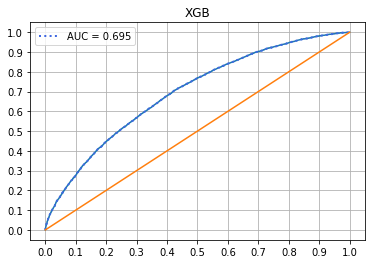

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=TEST_SIZE, random_state=0)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {'max_depth': 9, 'objective':'binary:hinge', 'grow_policy' : 'lossguide', 'predictor' : 'gpu_predictor',
        'booster' : 'dart', 'rate_drop' : 0.02, 'tree_method' : 'gpu_hist'}

param_2 = {'booster': 'dart',
         'max_depth': 8, 'learning_rate': 0.1,
         'objective': 'binary:logistic',
         'sample_type': 'weighted',#select dropped trees based on weight
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'skip_drop': 0.5}

watchlist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 200


bst = xgb.train(param_2, dtrain, num_round, watchlist)
models['XGB'] = bst
plot_roc(y_test, bst.predict(dtest), "XGB")

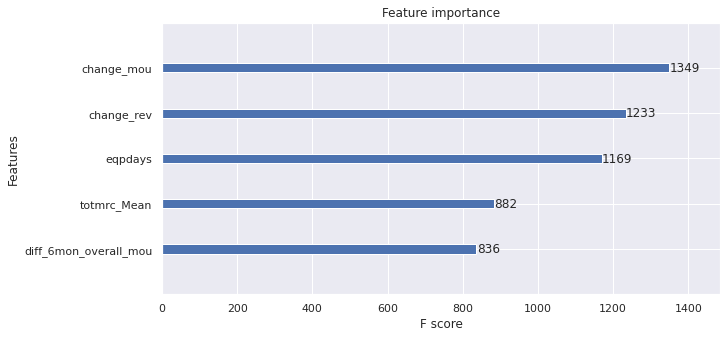

In [ ]:
ax = xgb.plot_importance(bst, max_num_features=5)
fig = ax.figure
fig.set_size_inches(10, 5)

# **2割引きdf**

In [ ]:
df_origin = pd.read_csv('/content/drive/MyDrive/Telecom_customer churn.csv')

In [ ]:
df_530 = df_origin[df_origin['eqpdays'] >= 530]
df_530_under = df_origin[df_origin['eqpdays'] < 530]
print(df_530.shape)
print(df_530_under.shape)

(25044, 100)
(74955, 100)


In [ ]:
df_530 = df_origin[df_origin['eqpdays'] >= 530]
df_530_under = df_origin[df_origin['eqpdays'] < 530]
df_530['rev_Mean'] = df_530['rev_Mean'] * 0.8
df_discount = pd.concat([df_530_under, df_530], axis=0).sort_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def plot_roc(y_true, y_pred, title):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    #print(fpr, tpr, prec, rec)
    plt.plot(fpr, tpr)
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_true,y_pred),3)))
    plt.legend(loc='best')
    plt.plot([0,1], [0,1])
    plt.xticks(np.arange(0,1.1,0.1))
    plt.yticks(np.arange(0,1.1,0.1))
    plt.grid(b=True, which='both')
    plt.title(title)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.show()

In [ ]:
df_discount.columns[df_discount.dtypes.values == "object"]

categ_nominal = ['new_cell', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap',
                 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic',
                 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']

categ_ordinal_ordered = ['crclscod']

pd.get_dummies(df_discount['new_cell'], prefix='new_cell', dummy_na=True)
df_discount_p = df_discount.copy()
for i in categ_nominal:
    df_discount = pd.concat([df_discount, pd.get_dummies(df_discount[i], prefix=i, dummy_na=True)], sort=False, axis=1)

df_discount = df_discount.drop(categ_nominal, axis=1)

for i in categ_ordinal_ordered:
    s_a = sorted(df_discount[i].unique())
    s_a_dict = {i:x for x,i in enumerate(s_a)}
    df_discount[i] = df_discount[i].map(s_a_dict)

df_discount.columns[df_discount.dtypes.values == "object"] 



In [ ]:
df['vce_blk_rate'] = 0
df.loc[ df['plcd_vce_Mean'] > 0, 'vce_blk_rate'] = df['blck_vce_Mean'] / df['plcd_vce_Mean']

df['vce_drp_rate'] = 0
df.loc[ df['plcd_vce_Mean'] > 0, 'vce_drp_rate'] = df['drop_vce_Mean'] / df['plcd_vce_Mean']

df['dat_blk_rate'] = 0
df.loc[ df['plcd_dat_Mean'] > 0, 'dat_blk_rate'] = df['blck_dat_Mean'] / df['plcd_dat_Mean']

df['dat_drp_rate'] = 0
df.loc[ df['plcd_dat_Mean'] > 0, 'dat_drp_rate'] = df['drop_dat_Mean'] / df['plcd_dat_Mean']

df['vce_cmpt_rate'] = 0
df.loc[ df['plcd_vce_Mean'] > 0, 'vce_cmpt_rate'] = df['comp_vce_Mean'] / df['plcd_vce_Mean']

df['dat_cmpt_rate'] = 0
df.loc[ df['plcd_dat_Mean'] > 0, 'dat_cmpt_rate'] = df['comp_dat_Mean'] / df['plcd_dat_Mean']

df['tot_cmpt_rate'] = 0
df.loc[ df['attempt_Mean'] > 0, 'tot_cmpt_rate'] = df['complete_Mean'] / df['attempt_Mean']

df['tot_drp_blk_rate'] = 0
df.loc[ df['attempt_Mean'] > 0, 'tot_drp_blk_rate'] = df['drop_blk_Mean'] / df['attempt_Mean']

df['vce_dat_ratio'] = 0
df.loc[ (df['plcd_vce_Mean'] + df['plcd_dat_Mean']) > 0, 'tot_drp_blk_rate'] = df['plcd_vce_Mean'] /  (df['plcd_vce_Mean'] + df['plcd_dat_Mean'])

df['diff_3mon_overall_mou'] = 0
df.loc[ (df['avgmou'] == df['avgmou']) & (df['avg3mou'] == df['avg3mou']), 'diff_3mon_overall_mou'] = (df['avg3mou'] - df['avgmou']) / df['avgmou']

df['diff_3mon_overall_qty'] = 0
df.loc[ (df['avgqty'] == df['avgqty']) & (df['avg3qty'] == df['avg3qty']), 'diff_3mon_overall_qty'] = (df['avg3qty'] - df['avgqty']) / df['avgqty']

df['diff_3mon_overall_rev'] = 0
df.loc[ (df['avgrev'] == df['avgrev']) & (df['avg3rev'] == df['avg3rev']), 'diff_3mon_overall_rev'] = (df['avg3rev'] - df['avgrev']) / df['avgrev']

df['diff_6mon_overall_mou'] = 0
df.loc[ (df['avgmou'] == df['avgmou']) & (df['avg6mou'] == df['avg6mou']), 'diff_6mon_overall_mou'] = (df['avg6mou'] - df['avgmou']) / df['avgmou']

df['diff_6mon_overall_qty'] = 0
df.loc[ (df['avgqty'] == df['avgqty']) & (df['avg6qty'] == df['avg6qty']), 'diff_6mon_overall_qty'] = (df['avg6qty'] - df['avgqty']) / df['avgqty']

df['diff_6mon_overall_rev'] = 0
df.loc[ (df['avgrev'] == df['avgrev']) & (df['avg6rev'] == df['avg6rev']), 'diff_6mon_overall_rev'] = (df['avg6rev'] - df['avgrev']) / df['avgrev']

df['total_nulls'] = 0
df.loc[:, 'total_nulls'] = np.sum(pd.isnull(df), axis=1)

df['eqpdays_digitized'] = np.digitize(df['eqpdays'], bins=[-10, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 5000])

# **predict**

In [ ]:
df_discount.drop('churn', axis=1, inplace=True)

In [ ]:
xgb.DMatrix(df_discount)
bst.predict(df_discount)

AttributeError: ignored

Text(0, 0.5, 'change_mou')

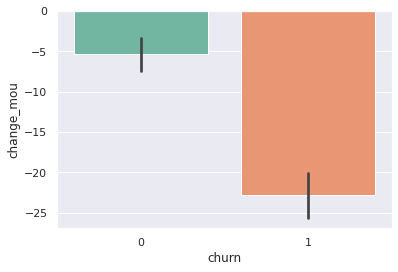

In [ ]:
#barplotは平均だよ
a = sns.barplot(x='churn', y='change_mou', data=df_origin, palette='Set2')
a.set_ylabel('change_mou')

In [ ]:
df_origin[['churn', 'change_mou']].groupby('churn').median()

,change_mou
churn,
0,-3.0
1,-10.0


Text(0, 0.5, 'eqpdays')

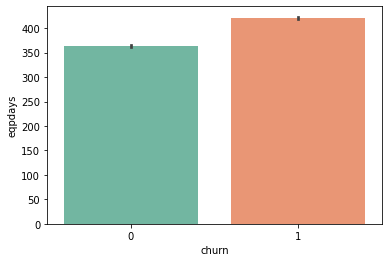

In [ ]:
a = sns.barplot(x='churn', y='eqpdays', data=df_origin, palette='Set2')
a.set_ylabel('eqpdays')

In [ ]:
df_origin[['churn', 'eqpdays']].groupby('churn').mean()

,eqpdays
churn,
0,363.280925
1,421.089524


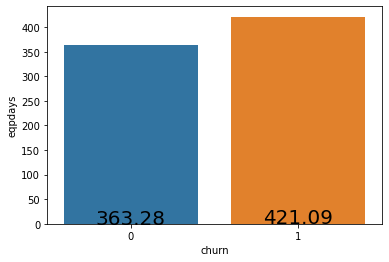

In [ ]:
grouped_values = df_origin.groupby('churn')['eqpdays'].mean().reset_index()
g = sns.barplot(x='churn', y='eqpdays', data=grouped_values)

#iteritems()メソッドを使うと、1列ずつコラム名（列名）と
#その列のデータ（pandas.Series型）のタプル(column name, Series)を取得できる。
for index, row in grouped_values.iterrows():
    g.text(row.churn, row.churn, round(row.eqpdays, 2), color='black', size=20, ha='center')

# **eqpdaysに焦点**

In [ ]:
df_origin['eqpdays'].mean()

391.93230932309325

In [ ]:
a = np.count_nonzero(df_origin['eqpdays'] >= 530)
b = np.count_nonzero(df_origin['eqpdays'] < 530)
print('530より上:{}'.format(a))
print('530より下:{}'.format(b))

391より上:25044
391より下:74955


In [ ]:
df_origin['eqpdays'].quantile(0.75)

530.0

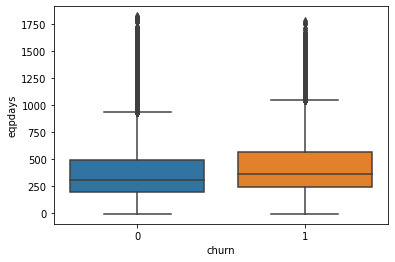

In [ ]:
df_1 = df_origin[['churn', 'eqpdays']]
sns.boxplot(x='churn', y='eqpdays', data=df_1)

# **Keras**

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=0.0001), metrics=['accuracy'], )

model.fit(X_train, y_train, epochs=20, batch_size=20, validation_data=(X_test, y_test))
models['Keras'] = model

plot_roc(y_test, model.predict(X_test), title="Keras ")

ValueError: ignored

# **Decision Tree**

In [ ]:
for name in classifiers.keys():
    print("Starting with ", name)
    clf = classifiers[name]
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    CM = confusion_matrix(y_test, y_pred)
    print(X_test[y_pred != y_test].index.values)
    print("Name {}, Score {}, Precision {}, Recall {}".format(name, score, prec, rec))
    print(CM)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plot_confusion_matrix(y_test, y_pred, classes=["loyal", "churn"],
                          title='Confusion matrix, with normalization', normalize=True)
    plt.show()
    
    models[name] = clf
    
    plot_roc(y_test, y_pred, title="Clf:" + name)

Starting with  Decision trees


ValueError: ignored